In [1]:
import pandas as pd


df = pd.read_json("/Users/viewyan/fairchem/src/fairchem/data/odac/force_field/data_w_oms.json")  # 请替换成你本地的路径


print("Sample number：", len(df))
print("field name：", df.columns.tolist())


print(df['set'].value_counts())



Sample number： 51478
field name： ['name', 'y', 'y_sys', 'y_mof', 'y_mol', 'id', 'set', 'path', 'oms', 'defective', 'ff']
set
train    48875
test      1391
val       1212
Name: count, dtype: int64


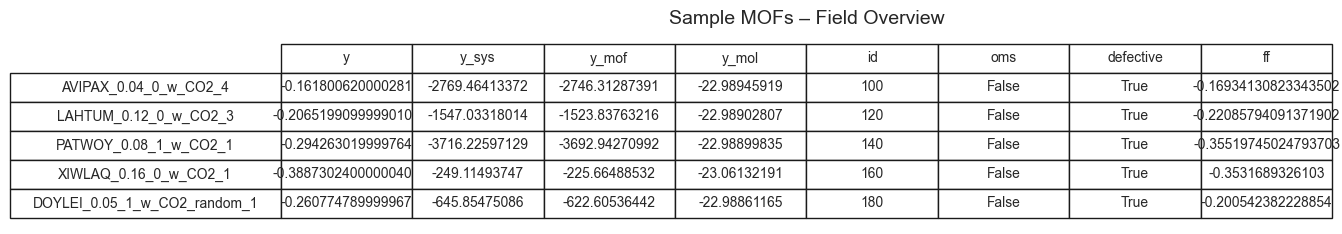

In [24]:
import matplotlib.pyplot as plt


columns_to_show = [col for col in df_full.columns if col != 'name' and pd.api.types.is_numeric_dtype(df_full[col])]


df_preview = df_full.set_index('name')[columns_to_show].head(5)


fig, ax = plt.subplots(figsize=(14, 2.5))  # 宽一点，高度根据你内容调
ax.axis('off')

table = ax.table(cellText=df_preview.values,
                 colLabels=df_preview.columns,
                 rowLabels=df_preview.index,
                 loc='center',
                 cellLoc='center',
                 rowLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.8)

plt.title("Sample MOFs – Field Overview", fontsize=14, pad=10)
plt.tight_layout()
plt.show()


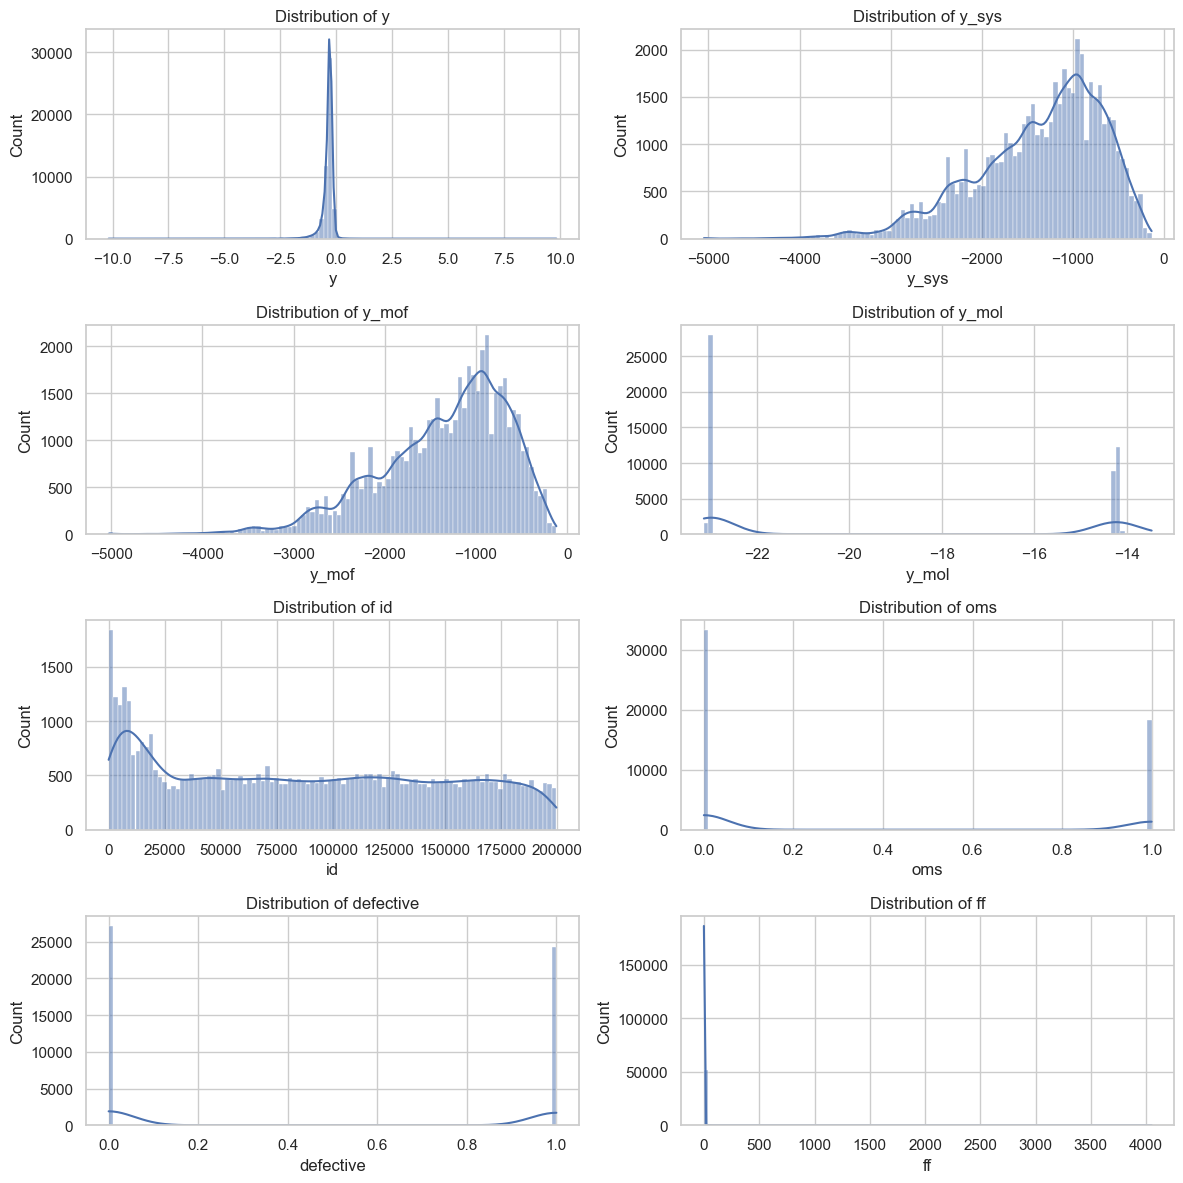

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import math


exclude_fields = ['name']


columns_to_plot = [col for col in df_full.columns if col not in exclude_fields and pd.api.types.is_numeric_dtype(df_full[col])]


cols_per_page = 8
n_pages = math.ceil(len(columns_to_plot) / cols_per_page)

for page in range(n_pages):
    subset = columns_to_plot[page * cols_per_page : (page + 1) * cols_per_page]
    fig, axes = plt.subplots(4, 2, figsize=(12, 12))
    axes = axes.flatten()

    for i, col in enumerate(subset):
        sns.histplot(df_full[col], bins=100, kde=True, ax=axes[i])
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Count")


    for j in range(len(subset), 8):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


df_ml = pd.read_json("/Users/viewyan/fairchem/src/fairchem/data/odac/force_field/data_w_ml.json")


print("Sample number：", len(df_ml))
print("field name：", df_ml.columns.tolist())


Sample number： 1693
field name： ['dft', 'ads', 'id', 'name', 'set', 'oms', 'defective', 'ml', 'ff']


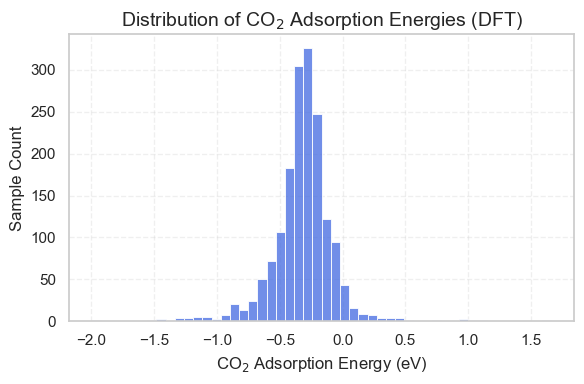

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.histplot(df_ml['dft'], bins=50, kde=False, color='royalblue')
plt.title("Distribution of CO$_2$ Adsorption Energies (DFT)", fontsize=14)
plt.xlabel("CO$_2$ Adsorption Energy (eV)", fontsize=12)
plt.ylabel("Sample Count", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [56]:
import pandas as pd


df_full = pd.read_json("/Users/viewyan/fairchem/src/fairchem/data/odac/force_field/data_w_oms.json")
df_small = pd.read_json("/Users/viewyan/fairchem/src/fairchem/data/odac/force_field/data_w_ml.json")

df_oms = df_full[['id', 'y', 'oms', 'defective']]
df_ml = df_small[['id', 'dft', 'ml', 'ff']]

df_compare = pd.merge(df_oms, df_ml, on='id')

print(df_compare.head())


    id         y    oms  defective       dft        ml        ff
0  100 -0.161801  False       True -0.414450 -0.397217  0.087584
1  160 -0.388730  False       True -0.346068 -0.387695 -0.481284
2  180 -0.260775  False       True -0.448868 -0.739258 -0.464014
3  380 -0.284581  False       True  0.346196  0.019287 -0.217774
4  420 -0.446775  False       True -0.448081 -0.456787 -0.104122


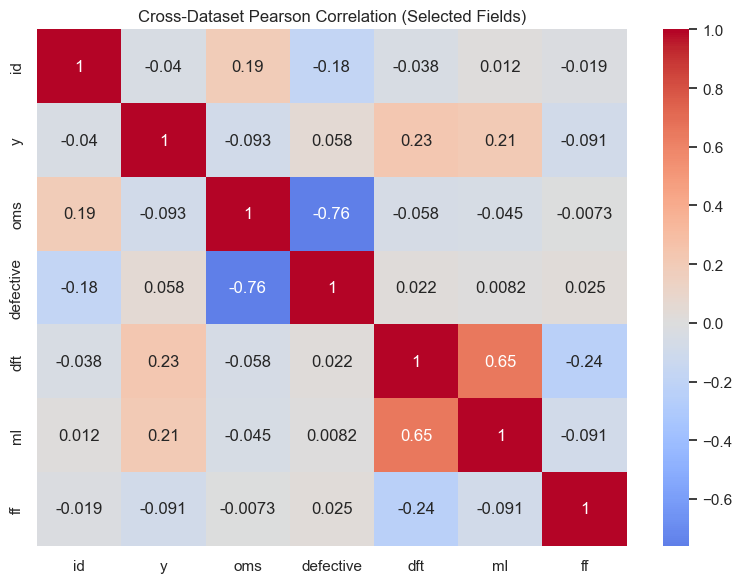

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_compare.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Cross-Dataset Pearson Correlation (Selected Fields)")
plt.tight_layout()
plt.show()


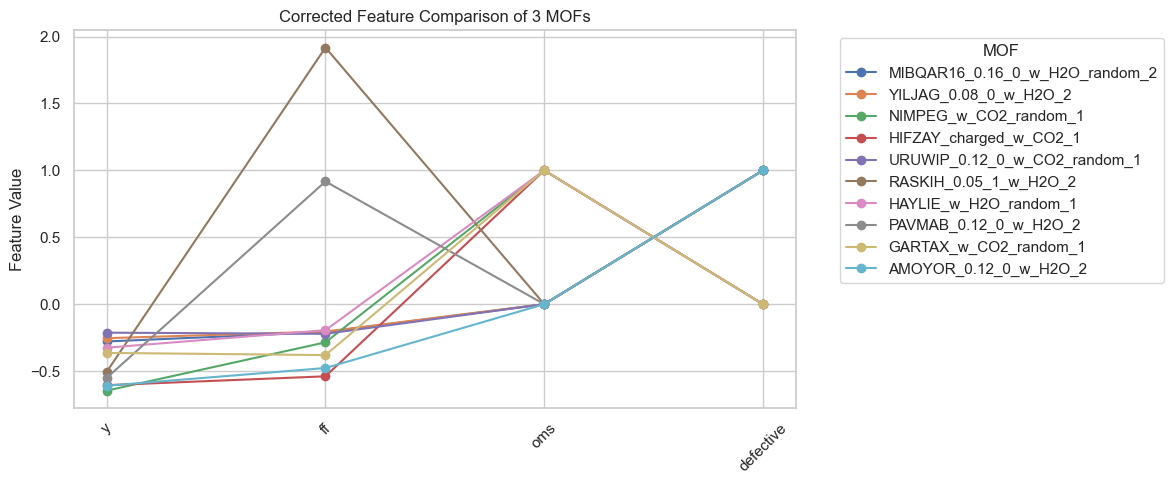

In [54]:
import pandas as pd
import matplotlib.pyplot as plt


df_full = pd.read_json("/Users/viewyan/fairchem/src/fairchem/data/odac/force_field/data_w_oms.json")

selected_features = ['y', 'ff', 'oms', 'defective']
df_numeric = df_full[selected_features + ['name']].copy()

df_numeric['oms'] = df_numeric['oms'].astype(int)
df_numeric['defective'] = df_numeric['defective'].astype(int)

df_samples = df_numeric.sample(n=10, random_state=42).set_index('name')
df_plot = df_samples.T

plt.figure(figsize=(12, 5))
for col in df_plot.columns:
    plt.plot(df_plot.index, df_plot[col], marker='o', label=col)

plt.title("Corrected Feature Comparison of 3 MOFs")
plt.ylabel("Feature Value")
plt.xticks(rotation=45)
plt.legend(title="MOF", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
